# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [178]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']




---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [179]:
import pandas as pd
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[1].shape

# TODO: How many unique classes/labels there are in the dataset.
df = pd.DataFrame({'label': y_train})
n_classes = len(df.label.unique())

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Some traffic sign images from the dataset:


//anaconda/envs/IntroToTensorFlow/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


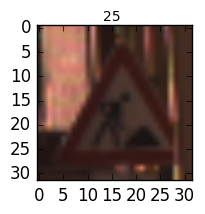

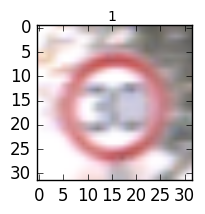

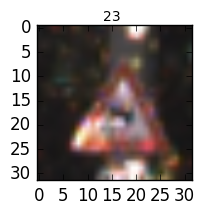

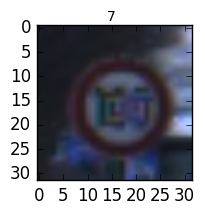

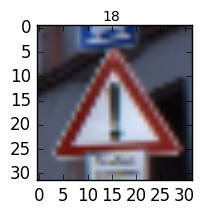

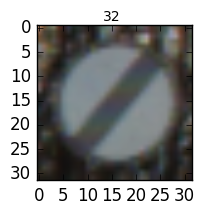

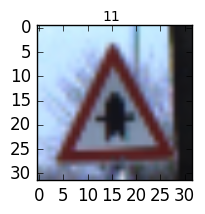

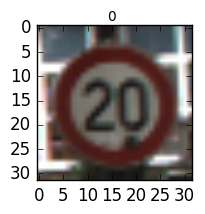

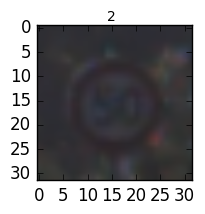

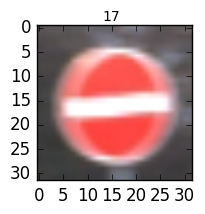

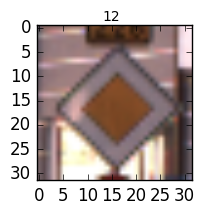

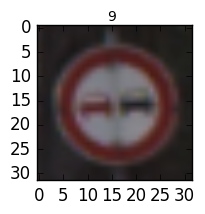

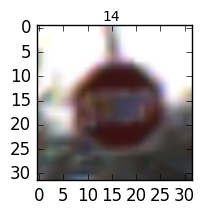

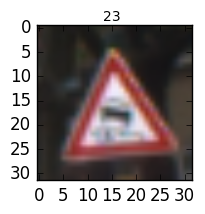

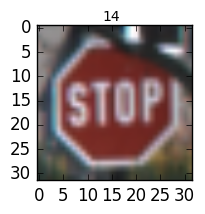

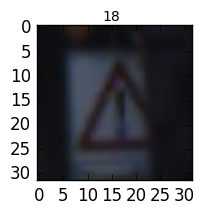

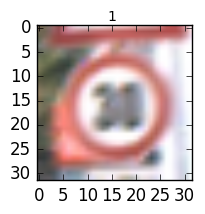

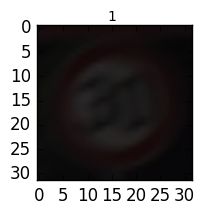

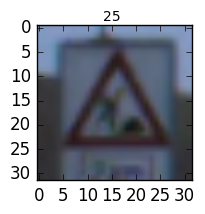

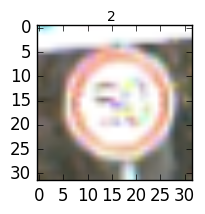

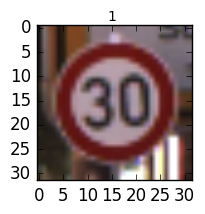

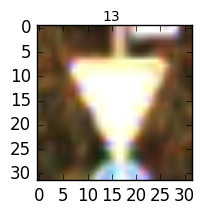

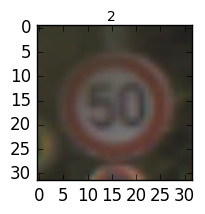

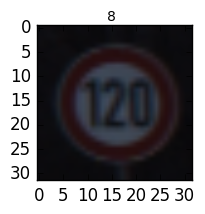

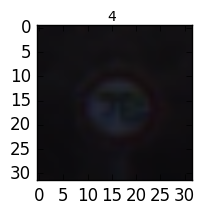

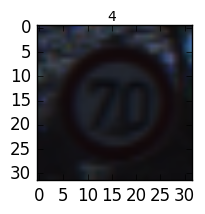

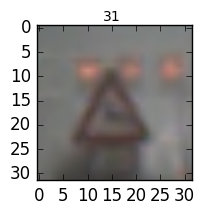

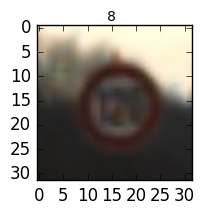

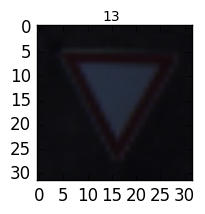

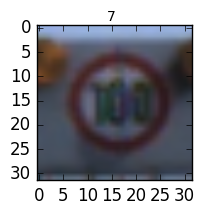

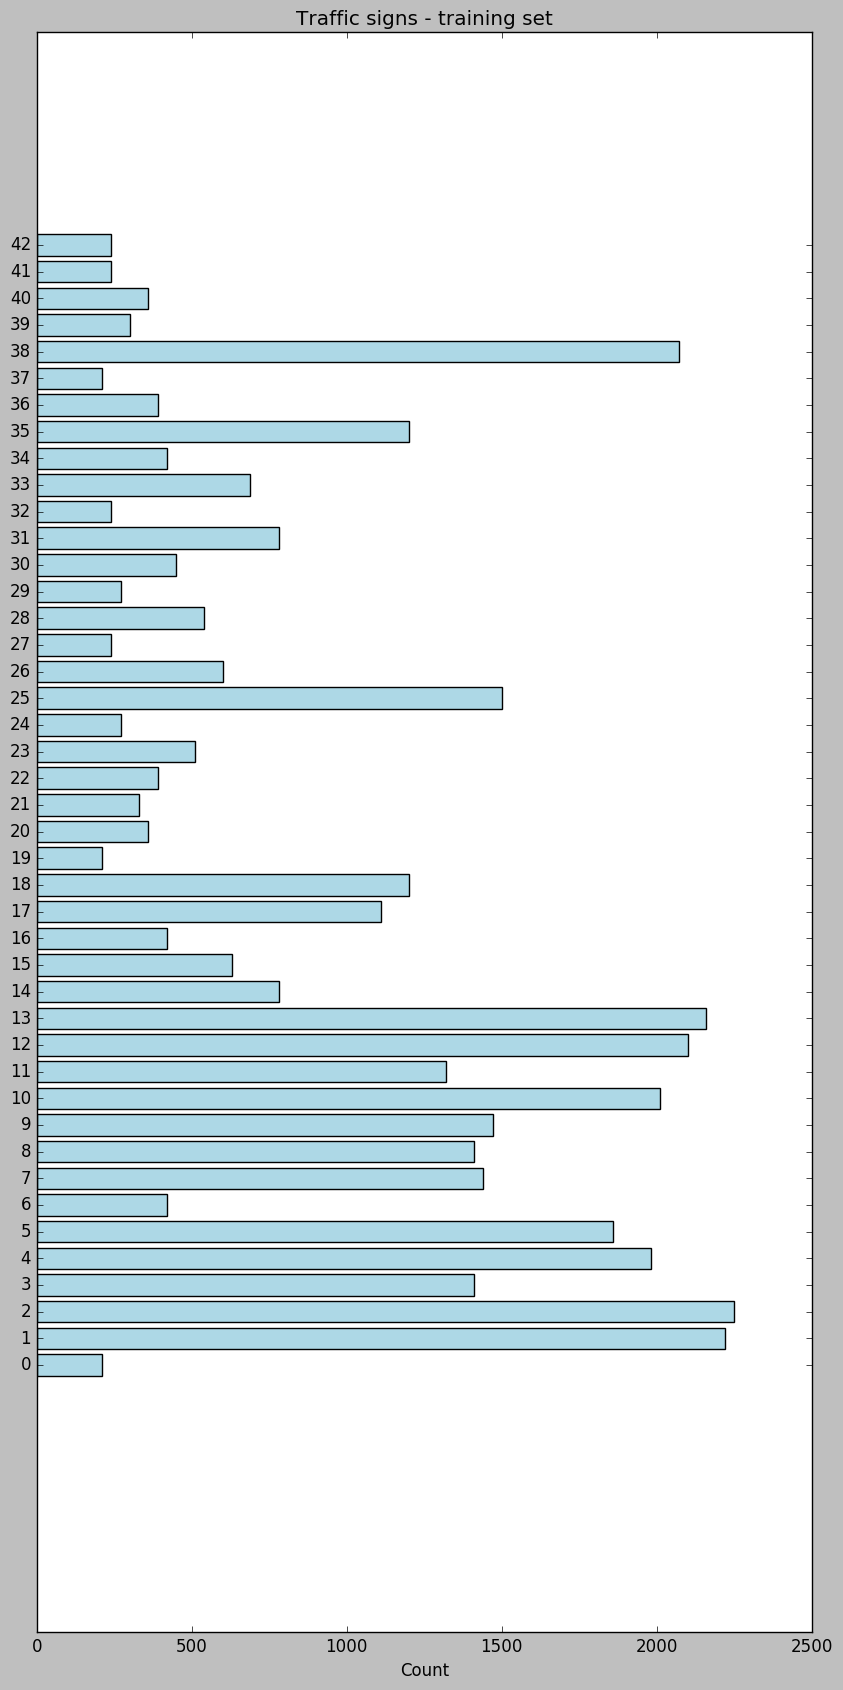

In [180]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline


from sklearn.utils import shuffle

#shuffle original train set
saved_X_train, saved_y_train = shuffle(X_train, y_train)


print('Some traffic sign images from the dataset:')
for i in range(30):
    index = random.randint(0, len(saved_X_train))
    image = saved_X_train[index]
    fig = plt.figure(figsize=(2,2))
    fig = fig.suptitle(saved_y_train[index], fontsize=10)

    plt.imshow(image)
    



#A horizontal bar chart.

import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
counts = Counter(y_train)
#print(counts)

labels, counts = zip(*counts.items())
y_pos = np.arange(len(labels))

#print(counts)

ax.barh(y_pos, counts, align='center',
        color='lightblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
#ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('Traffic signs - training set')

fig.set_size_inches( 10, 20 )
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [181]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]

    gray = 0.3 * r + 0.6 * g + 0.1 * b
    gray = gray.reshape(gray.shape + (1,))

    return gray

#Convert the train set to grayscale
X_train = [rgb2gray(x) for x in X_train]

#Normalize the train set:
X_train = np.asarray(X_train)/255.0


#Convert to grayscale
X_test = [rgb2gray(x) for x in X_test]
#Normalize the test set:
X_test = np.asarray(X_test)/255.0

print('Test set size: ', len(X_test))
print('Test set shape: ', X_test[34].shape)
print('Done')

Test set size:  12630
Test set shape:  (32, 32, 1)
Done


### Split Data into Training, Validation and Testing Sets

In [182]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
##

from sklearn.utils import shuffle

#shuffle original train set
saved_X_train, saved_y_train = shuffle(X_train, y_train)

offset = len(saved_X_train)-5000-1

#Validation set
X_validation = np.asarray(saved_X_train[(offset+1):])
y_validation = saved_y_train[(offset+1):]

#Training set
X_train = np.asarray(saved_X_train[0:offset])
y_train = saved_y_train[0:offset]

#Testing set
X_test = np.asarray(X_test)
#y_test = y_test

print (len(X_validation))
print (len(X_train))
print (len(X_test))



5000
34208
12630



### Model Architecture

#### LeNet-5

In [183]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    #n_classes = 43
    """
    weights = {
        'layer1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mu, sigma)),
        'layer2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma)),
        'full_layer3': tf.Variable(tf.truncated_normal([5*5*16, 120], mu, sigma)),
        'full_layer4': tf.Variable(tf.truncated_normal([120, 84], mu, sigma)),
        'full_layer5': tf.Variable(tf.truncated_normal([84, n_classes], mu, sigma))
    }
    """
    weights = {
        'layer1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mu, sigma)),
        'layer2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma)),
        'full_layer3': tf.Variable(tf.truncated_normal([5*5*16, 120], mu, sigma)),
        'full_layer4': tf.Variable(tf.truncated_normal([120, 84], mu, sigma)),
        'full_layer5': tf.Variable(tf.truncated_normal([120, n_classes], mu, sigma))
    }
    
    bias = {
        'layer1': tf.Variable(tf.truncated_normal([6], mu, sigma)),
        'layer2': tf.Variable(tf.truncated_normal([16], mu, sigma)),
        'full_layer3': tf.Variable(tf.truncated_normal([120], mu, sigma)),        
        'full_layer4': tf.Variable(tf.truncated_normal([84], mu, sigma)),
        'full_layer5': tf.Variable(tf.truncated_normal([n_classes], mu, sigma))
    }
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    layer1_conv = tf.nn.conv2d(x, filter=weights['layer1'], strides=[1, 1, 1, 1], padding='VALID' )
    layer1_conv = tf.nn.bias_add(layer1_conv, bias['layer1'])

    # Activation.
    layer1_activation = tf.nn.relu(layer1_conv)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    layer1_maxpool =  tf.nn.max_pool(layer1_activation, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    layer2_conv = tf.nn.conv2d(layer1_maxpool, filter=weights['layer2'], strides=[1, 1, 1, 1], padding='VALID' )
    layer2_conv = tf.nn.bias_add(layer2_conv, bias['layer2'])
    
    # Activation.
    layer2_activation = tf.nn.relu(layer2_conv)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2_maxpool =  tf.nn.max_pool(layer2_activation, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    layer2_flatten = tf.reshape(layer2_maxpool, [-1, weights['full_layer3'].get_shape().as_list()[0]])
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    full_layer3_conv = tf.add(tf.matmul(layer2_flatten, weights['full_layer3']), bias['full_layer3'])
    # Activation.
    full_layer3_activation = tf.nn.relu(full_layer3_conv)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    #full_layer3_reshape = tf.reshape(full_layer3_activation, [-1, weights['full_layer4'].get_shape().as_list()[0]])
    #full_layer4_conv = tf.add(tf.matmul(full_layer3_reshape, weights['full_layer4']), bias['full_layer4'])

    # Activation.
    #full_layer4_activation = tf.nn.relu(full_layer4_conv)
    full_layer4_activation = full_layer3_activation

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    full_layer4_reshape = tf.reshape(full_layer4_activation, [-1, weights['full_layer5'].get_shape().as_list()[0]])
    logits = tf.add(tf.matmul(full_layer4_reshape, weights['full_layer5']), bias['full_layer5'])

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [184]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.



#Params
EPOCHS = 50
BATCH_SIZE = 128

print(n_classes)

43


#### Features and Labels

In [185]:
#Placeholders for features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))

#Use 3 color channels
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))

y = tf.placeholder(tf.int32, (None))
#n_classes = 43
one_hot_y = tf.one_hot(y, n_classes)

In [186]:
#Training pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [187]:
# Validation/Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [188]:
# Train
from sklearn.utils import shuffle

with tf.Session() as sess:
    #sess.run(tf.initialize_all_variables())    #
    sess.run(tf.global_variables_initializer())

    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.718

EPOCH 2 ...
Validation Accuracy = 0.853

EPOCH 3 ...
Validation Accuracy = 0.908

EPOCH 4 ...
Validation Accuracy = 0.926

EPOCH 5 ...
Validation Accuracy = 0.938

EPOCH 6 ...
Validation Accuracy = 0.949

EPOCH 7 ...
Validation Accuracy = 0.962

EPOCH 8 ...
Validation Accuracy = 0.962

EPOCH 9 ...
Validation Accuracy = 0.961

EPOCH 10 ...
Validation Accuracy = 0.971

EPOCH 11 ...
Validation Accuracy = 0.968

EPOCH 12 ...
Validation Accuracy = 0.972

EPOCH 13 ...
Validation Accuracy = 0.973

EPOCH 14 ...
Validation Accuracy = 0.977

EPOCH 15 ...
Validation Accuracy = 0.977

EPOCH 16 ...
Validation Accuracy = 0.976

EPOCH 17 ...
Validation Accuracy = 0.976

EPOCH 18 ...
Validation Accuracy = 0.984

EPOCH 19 ...
Validation Accuracy = 0.981

EPOCH 20 ...
Validation Accuracy = 0.981

EPOCH 21 ...
Validation Accuracy = 0.976

EPOCH 22 ...
Validation Accuracy = 0.981

EPOCH 23 ...
Validation Accuracy = 0.982

EPOCH 24 ...
Validation Accura

In [189]:
 # Evaluate on training set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))

Train Accuracy = 0.992


In [190]:
# Evaluate on validation set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    validation_accuracy = evaluate(X_validation, y_validation)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Validation Accuracy = 0.977


In [191]:
# Evaluate on test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.895


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

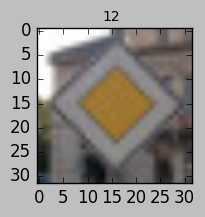

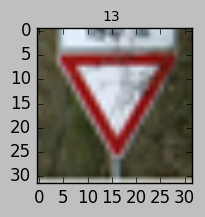

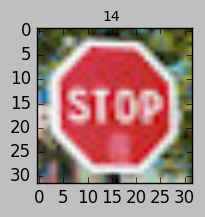

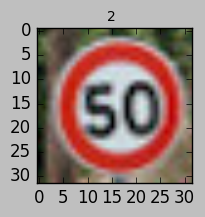

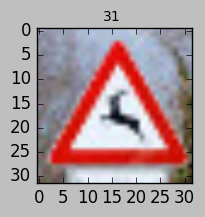

In [198]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image
import os, os.path

X_new_images = []
y_new_test = []
valid_images = [".jpg",".gif",".png",".tga"]
path = 'new_test_images'
for image in os.listdir(path):
    ext = os.path.splitext(image)[1]
    if ext.lower() not in valid_images:
        continue;
    img = Image.open(os.path.join(path, image))
    img_array = np.asarray(img, dtype="uint8" )
    X_new_images.append(img_array)
    y_new_test.append(int(image.split('_')[0]))
    
for index in range(len(X_new_images)):
    
    image = X_new_images[index]
    fig = plt.figure(figsize=(2,2))
    fig = fig.suptitle(y_new_test[index], fontsize=10)
    plt.imshow(image)

### Predict the Sign Type for Each Image

In [199]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#Convert the train set to grayscale
import numpy as np

X_new_test_gray = [rgb2gray(x) for x in X_new_images]

#Normalize the train set:
X_new_test_data = np.asarray(X_new_test_gray)/255.0

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: X_new_test_data})

print('Predictions:')
print(predictions)
print("Correct labels:")
print(y_new_test)
    
print('Done')

Predictions:
[12 13 14  3 31]
Correct labels:
[12, 13, 14, 2, 31]
Done


### Analyze Performance

In [200]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

accuracy_new_test = np.sum(predictions == y_new_test) / len(y_new_test)
print('New test images - Accuracy: ', accuracy_new_test)


New test images - Accuracy:  0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [204]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    probability = tf.nn.softmax(logits)
    probs = sess.run(probability, feed_dict={x: X_new_test_data})
    
    top5 = sess.run(tf.nn.top_k(tf.constant(probs), k=5)) 
print(top5)

TopKV2(values=array([[  9.99998689e-01,   1.34217316e-06,   4.02543812e-08,
          7.10949566e-09,   6.91445096e-11],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   4.92779239e-14,   4.53347088e-19,
          3.80853238e-19,   2.32363629e-20],
       [  8.78071070e-01,   1.21928960e-01,   2.32654904e-17,
          1.43869136e-25,   5.17113053e-26],
       [  1.00000000e+00,   4.14501333e-14,   1.82951358e-14,
          3.09505442e-17,   8.13392740e-20]], dtype=float32), indices=array([[12, 13, 15,  2, 35],
       [13,  0,  1,  2,  3],
       [14, 17,  1, 40,  5],
       [ 3,  2,  5,  1, 10],
       [31, 19, 21, 23, 10]], dtype=int32))


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 